<a href="https://colab.research.google.com/github/Edenshmuel/PapaJohns_Data_Science_Project/blob/main/Creating_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import re
from collections import defaultdict

folder_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'
files = os.listdir(folder_path)

files_by_year = defaultdict(list)

for file in files:
    match = re.search(r'20\d{2}', file)
    if match:
        year = match.group()
        files_by_year[year].append(file)
    else:
        files_by_year['לא זוהתה שנה'].append(file)

for year, file_list in files_by_year.items():
    print(f"year: {year}")
    for f in file_list:
        print(f"  - {f}")

year: 2022
  - April_June_2022.csv
  - January_March_2022.xlsx
  - July_December_2022.csv
year: 2025
  - Few_days_2025.xlsx
year: 2023
  - January_March_2023.xlsx
  - August_December_2023.csv
  - April_July_2023.xlsx
year: 2024
  - 2024_cleaned.xlsx


In [29]:
path_2024 = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files/2024_cleaned.xlsx'
df_2024 = pd.read_excel(path_2024)

df_2024['Date'] = pd.to_datetime(df_2024['תאריך'], format='%d/%m/%Y', errors='coerce')
df_2024['Month'] = df_2024['Date'].dt.month

display(df_2024[['Date', 'Month']])

,Date,Month
0,2024-01-01,1
1,2024-01-01,1
2,2024-01-01,1
3,2024-01-01,1
4,2024-01-01,1
...,...,...
144772,2024-12-31,12
144773,2024-12-31,12
144774,2024-12-31,12
144775,2024-12-31,12


In [42]:
# Save cleaned 2024 file with 'Date' and 'Month' columns
final_output_2024 = '/content/drive/MyDrive/Final_Progect_PapaJohns/2024_combined.xlsx'
df_2024.to_excel(final_output_2024, index=False)

print(f"✅ 2024 data with 'Month' column saved to:\n{final_output_2024}")

✅ 2024 data with 'Month' column saved to:
/content/drive/MyDrive/Final_Progect_PapaJohns/2024_combined.xlsx


In [30]:
files_2023_with_dates = [
    'January_March_2023.xlsx',
    'April_July_2023.xlsx']

df_list = []
for file in files_2023_with_dates:
    path = os.path.join(folder_path, file)
    print(f"Reading: {file}")
    try:
        df = pd.read_excel(path)
        df['Source File'] = file
        df_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

if df_list:
    df_2023 = pd.concat(df_list, ignore_index=True)
    print(f"✅ Combined {len(df_2023)} rows from 2023 files with dates.")
    display(df_2023.head())
else:
    print("No data loaded.")

Reading: January_March_2023.xlsx
Reading: April_July_2023.xlsx
✅ Combined 74773 rows from 2023 files with dates.


,תאריך,הזמנה,סוג פריט,תאור סוג,מס' פריט,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה,Source File
0,2023-01-01,4602469,3,פיצות מיוחדות 14',54,טבעות בצל,1,24.90,0.0,24.90,January_March_2023.xlsx
1,2023-01-01,4602469,5,פיצות מיוחדות 14',71,ספרייט זירו 1.5 ליטר,1,13.90,0.0,13.90,January_March_2023.xlsx
2,2023-01-01,4602469,6,פיצות מיוחדות 14',86,רוטב פיצה קטן,1,0.00,0.0,0.00,January_March_2023.xlsx
3,2023-01-01,4602469,13,פיצות מיוחדות 14',20,קלאסית 14' [],1,72.90,0.0,72.90,January_March_2023.xlsx
4,2023-01-01,4602470,7,פיצות מיוחדות 14',107,זיתים ירוקים,1,5.45,0.0,5.45,January_March_2023.xlsx


In [31]:
df_2023 = df_2023.rename(columns={'תאריך': 'Date'})
df_2023['Date'] = pd.to_datetime(df_2023['Date'], errors='coerce')

df_2023['Month'] = df_2023['Date'].dt.month

print("📅 2023 data with Date + Month columns:")
display(df_2023[['Date', 'Month']])

📅 2023 data with Date + Month columns:


,Date,Month
0,2023-01-01,1
1,2023-01-01,1
2,2023-01-01,1
3,2023-01-01,1
4,2023-01-01,1
...,...,...
74768,2023-07-31,7
74769,2023-07-31,7
74770,2023-07-31,7
74771,2023-07-31,7


In [32]:
import pandas as pd

file_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files/January_March_2022.xlsx'

df_2022_with_dates = pd.read_excel(file_path)

df_2022_with_dates = df_2022_with_dates.rename(columns={'תאריך': 'Date'})
df_2022_with_dates['Date'] = pd.to_datetime(df_2022_with_dates['Date'], errors='coerce')

df_2022_with_dates['Month'] = df_2022_with_dates['Date'].dt.month

print("📅 2022 data (Jan–Mar) with Date and Month columns:")
display(df_2022_with_dates[['Date', 'Month']])

📅 2022 data (Jan–Mar) with Date and Month columns:


,Date,Month
0,2022-01-01,1
1,2022-01-01,1
2,2022-01-01,1
3,2022-01-01,1
4,2022-01-01,1
...,...,...
36179,2022-03-31,3
36180,2022-03-31,3
36181,2022-03-31,3
36182,2022-03-31,3


In [33]:
df_aug_dec_2024 = df_2024[df_2024['Month'].between(8, 12)]

monthly_quantity = df_aug_dec_2024.groupby('Month')['כמות'].sum().sort_index()
month_distribution = monthly_quantity / monthly_quantity.sum()

print("📊 Month distribution in 2024 (Aug–Dec):")
display(month_distribution)

📊 Month distribution in 2024 (Aug–Dec):


,כמות
Month,
8,0.192267
9,0.171416
10,0.184919
11,0.186688
12,0.264711


In [41]:
import pandas as pd
import os

# === STEP 1: Define base path ===
base_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'

# === STEP 2: Load August–December 2023 CSV (no dates) ===
aug_dec_2023_path = os.path.join(base_path, 'August_December_2023.csv')
df_aug_dec_2023 = pd.read_csv(aug_dec_2023_path, encoding='utf-8')

# Apply month distribution to assign 'Month' column
total_rows = len(df_aug_dec_2023)
rows_per_month = (month_distribution * total_rows).round().astype(int)

df_parts = []
remaining_df = df_aug_dec_2023.copy()

for month, count in rows_per_month.items():
    part = remaining_df.iloc[:count].copy()
    part['Month'] = month
    df_parts.append(part)
    remaining_df = remaining_df.iloc[count:]

if len(remaining_df) > 0:
    most_common_month = rows_per_month.idxmax()
    remaining_df['Month'] = most_common_month
    df_parts.append(remaining_df)

df_aug_dec_2023_with_month = pd.concat(df_parts, ignore_index=True)

# === STEP 3: Load the Excel files with dates ===
jan_mar_2023 = pd.read_excel(os.path.join(base_path, 'January_March_2023.xlsx'))
apr_jul_2023 = pd.read_excel(os.path.join(base_path, 'April_July_2023.xlsx'))

# Create 'Date' and 'Month' columns
for df in [jan_mar_2023, apr_jul_2023]:
    df['Date'] = pd.to_datetime(df['תאריך'], errors='coerce')
    df['Month'] = df['Date'].dt.month

# === STEP 4: Concatenate in correct chronological order ===
df_2023_combined = pd.concat(
    [jan_mar_2023, apr_jul_2023, df_aug_dec_2023_with_month],
    ignore_index=True
)

# === STEP 5: Save final combined file ===
final_output_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/2023_combined.xlsx'
df_2023_combined.to_excel(final_output_path, index=False)

print(f"✅ All 2023 data combined (in correct order) and saved to:\n{final_output_path}")

✅ All 2023 data combined (in correct order) and saved to:
/content/drive/MyDrive/Final_Progect_PapaJohns/2023_combined.xlsx


In [49]:
# === 1. Load 2023 & 2024 combined files to calculate month distributions ===
df_2023 = pd.read_excel('/content/drive/MyDrive/Final_Progect_PapaJohns/2023_combined.xlsx')
df_2024 = pd.read_excel('/content/drive/MyDrive/Final_Progect_PapaJohns/2024_combined.xlsx')

# April–June → based on 2023 months 4–6
apr_jun_2023 = df_2023[df_2023['Month'].between(4, 6)]
apr_jun_dist = apr_jun_2023.groupby('Month')['כמות'].sum()
apr_jun_dist = apr_jun_dist / apr_jun_dist.sum()

# July–December → month 7 from 2023, months 8–12 from 2024
month_7_2023 = df_2023[df_2023['Month'] == 7].groupby('Month')['כמות'].sum()
months_8_12_2024 = df_2024[df_2024['Month'].between(8, 12)].groupby('Month')['כמות'].sum()
combined = pd.concat([month_7_2023, months_8_12_2024])
jul_dec_dist = combined / combined.sum()

# === 2. Define helper function to assign months ===
def assign_months_by_distribution(df, month_distribution):
    total_rows = len(df)
    rows_per_month = (month_distribution * total_rows).round().astype(int)

    df_parts = []
    remaining_df = df.copy()

    for month, count in rows_per_month.items():
        part = remaining_df.iloc[:count].copy()
        part['Month'] = month
        df_parts.append(part)
        remaining_df = remaining_df.iloc[count:]

    if len(remaining_df) > 0:
        most_common_month = rows_per_month.idxmax()
        remaining_df['Month'] = most_common_month
        df_parts.append(remaining_df)

    return pd.concat(df_parts, ignore_index=True)

# === 3. Load & assign months to 2022 files ===
base_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/Files'

# April–June 2022 (missing dates → use distribution)
df_apr_jun = pd.read_csv(os.path.join(base_path, 'April_June_2022.csv'), encoding='utf-8')
df_apr_jun_with_month = assign_months_by_distribution(df_apr_jun, apr_jun_dist)

# July–December 2022 (missing dates → use distribution)
df_jul_dec = pd.read_csv(os.path.join(base_path, 'July_December_2022.csv'), encoding='utf-8')
df_jul_dec_with_month = assign_months_by_distribution(df_jul_dec, jul_dec_dist)

# January–March 2022 (has real dates)
df_jan_mar = pd.read_excel(os.path.join(base_path, 'January_March_2022.xlsx'))
df_jan_mar['Date'] = pd.to_datetime(df_jan_mar['תאריך'], errors='coerce')
df_jan_mar['Month'] = df_jan_mar['Date'].dt.month

# === 4. Combine all parts in order: Jan–Mar, Apr–Jun, Jul–Dec ===
df_2022_combined = pd.concat(
    [df_jan_mar, df_apr_jun_with_month, df_jul_dec_with_month],
    ignore_index=True)

# === 5. Save final combined 2022 to Excel in parent folder ===
final_output_path = '/content/drive/MyDrive/Final_Progect_PapaJohns/2022_combined.xlsx'
df_2022_combined.to_excel(final_output_path, index=False)

print(f"✅ All 2022 data combined and saved to:\n{final_output_path}")

<ipython-input-49-dedd8c4353bf>:57: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2022_combined = pd.concat(


✅ All 2022 data combined and saved to:
/content/drive/MyDrive/Final_Progect_PapaJohns/2022_combined.xlsx


📋 מספר שורות (רכישות) לכל חודש בשנת 2022:


,count
Month,
1,13131
2,11396
3,11657
4,213
5,174
6,184
7,106
8,109
9,97


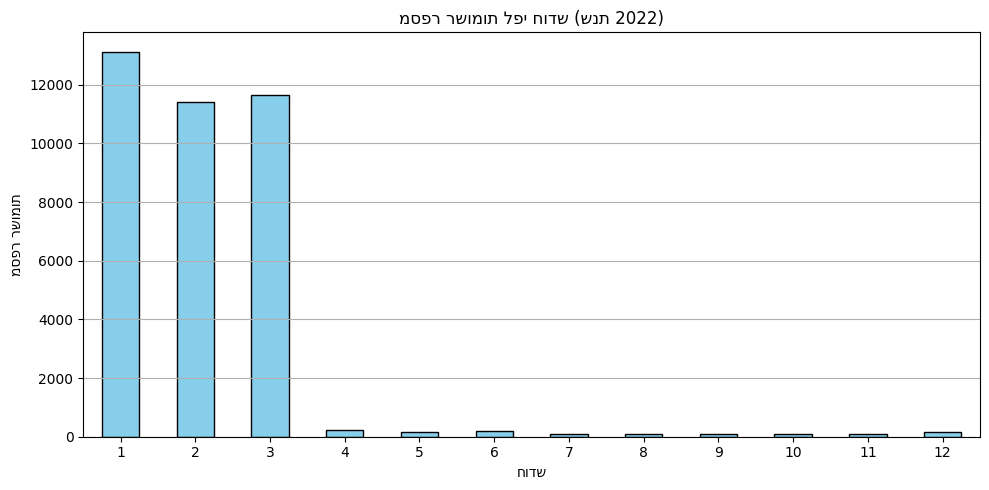

In [50]:
import matplotlib.pyplot as plt

month_counts = df_2022_combined['Month'].value_counts().sort_index()

print("📋 מספר שורות (רכישות) לכל חודש בשנת 2022:")
display(month_counts)

plt.figure(figsize=(10, 5))
month_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('מספר רשומות לפי חודש (שנת 2022)')
plt.xlabel('חודש')
plt.ylabel('מספר רשומות')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()